In [50]:
import pandas as pd
import numpy as np
import os
import csv
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import contingency
import seaborn as sns

In [2]:
cwd = os.getcwd()
filePath = cwd

In [3]:
def cleanDF(filePath, fileName):
    path = filePath + '/' + str(fileName) + '.csv'
    df = pd.read_csv(path, delimiter=';', index_col=False)
    return df

In [87]:
def plot(cleanedDF):
    palette = plt.get_cmap('Set1')
    cleanedDF.plot(figsize=(10, 5),alpha=0.7)
    
    xticks = []
    for i in range(len(cleanedDF)):
        postcode = cleanedDF.iloc[i,0]
        archetype = cleanedDF.iloc[i,1]
        xtick = str(postcode+', '+archetype)
        xticks.append(xtick)
    x_pos = np.arange(len(xticks))
    
    plt.legend(["liander_2017 kWh/m$^3$", "baseline_2017 kWh/m$^3$", "calibrated_2017 kWh/m$^3$"])
    plt.xticks(x_pos, xticks, rotation = 30)
    plt.ylim((15, 60))
    plt.title('Postcode 6 level calibrated result validation, 2017', fontsize=16)
    plt.xlabel('postcode, archetype', fontsize=14)
    plt.ylabel("Energy Use Intensity kWh/m$^3$", fontsize=14)

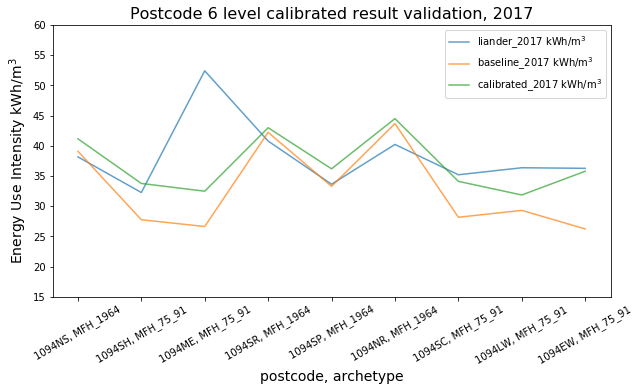

In [88]:
cleanedDF = cleanDF(filePath, 'Comparison_2017')
plot(cleanedDF)

In [85]:
def computePE(cleanedDF):
    cleanedDF['PE_baseline'] = abs(cleanedDF['l_pc6_consumption_kwh_m3']-cleanedDF['baseline_2017_kwh_m3'])*100/cleanedDF['l_pc6_consumption_kwh_m3']
    cleanedDF['PE_calibrated'] = abs(cleanedDF['l_pc6_consumption_kwh_m3']-cleanedDF['posterior_2017_kwh_m3'])*100/cleanedDF['l_pc6_consumption_kwh_m3']
    return cleanedDF

def plotPE(cleanedDF):
    plt.figure(figsize=(10, 5))
    palette = plt.get_cmap('Set1')
    barWidth = 0.4
    
    
    xticks = []
    for i in range(len(cleanedDF)):
        postcode = cleanedDF.iloc[i,0]
        archetype = cleanedDF.iloc[i,1]
        xtick = str(postcode+', '+archetype)
        xticks.append(xtick)

    r1 = np.arange(len(xticks))
    r2 = [x + barWidth for x in r1]
    plt.bar(r1, cleanedDF['PE_baseline'],width = barWidth, color=palette(4), alpha=0.7, label='baseline')
    plt.bar(r2, cleanedDF['PE_calibrated'],width = barWidth, color=palette(2), alpha=0.7, label='calibrated')
    
    plt.legend()
    plt.xticks(r1, xticks, rotation = 45)
    plt.ylim((0, 60))
    
    plt.axhline(y=5, color=palette(0), linestyle='-', linewidth=1)
    plt.annotate('ASHRAE allowable PE', xy=(0, 5), xytext=(7, 5.5))
    
    plt.title('Absolute percentage error: baseline v.s. calibrated, 2017', fontsize=16)
    plt.xlabel('postcode, archetype', fontsize=14)
    plt.ylabel("Percentage error %", fontsize=14)

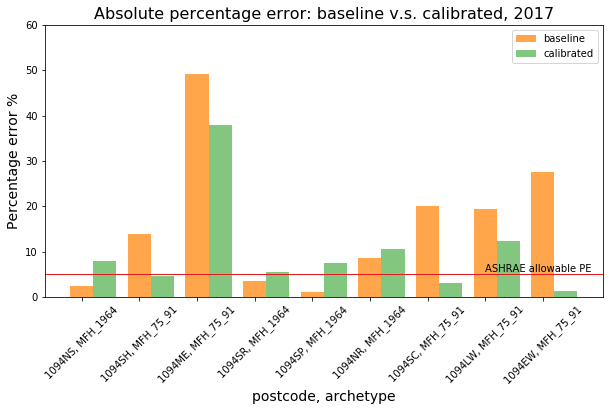

In [86]:
computePE(cleanedDF)
plotPE(cleanedDF)

## Archetype EUI distribution

In [18]:
def readMeasuredEUI():
    path = filePath + '/MeasuredEUI_2010.csv'
    df = pd.read_csv(path, delimiter=';', index_col=False)
    return df

In [26]:
df = readMeasuredEUI()
df.head()

,postcode,archetype,l_pc6_consumption_kwh_m3
0,1097EZ,SFH_1964,159.812928
1,1097HN,TH_75_91,154.802541
2,1097HP,TH_75_91,138.230051
3,1097HR,MFH_75_91,61.655148
4,1097HS,MFH_75_91,45.782379


In [36]:
df.groupby(["archetype"]).groups

{'MFH_1964': Int64Index([10, 11, 12, 13, 14, 16, 17, 18, 19, 21, 27, 28, 29, 32, 33, 46, 47,
             48, 50, 53, 54, 55, 56],
            dtype='int64'),
 'MFH_75_91': Int64Index([3, 4, 5, 6, 8, 25, 49, 51, 52, 57, 58, 59], dtype='int64'),
 'SFH_1964': Int64Index([0], dtype='int64'),
 'TH_1964': Int64Index([15, 20, 22, 23, 24, 26, 30, 31, 34, 35, 36, 37, 38, 39, 40, 41, 42,
             43, 44, 45],
            dtype='int64'),
 'TH_75_91': Int64Index([1, 2, 7, 9], dtype='int64')}

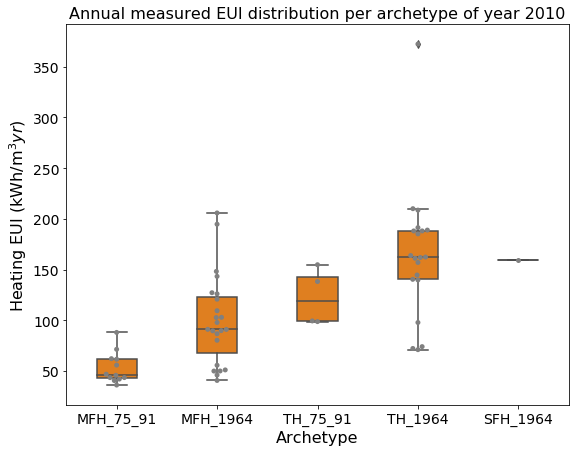

In [105]:
import seaborn as sns

plt.figure(figsize=(9, 7))
color = plt.get_cmap('Set1')

# Make boxplot for one group only
sns.boxplot(x=df["archetype"],y=df["l_pc6_consumption_kwh_m3"], order=["MFH_75_91", "MFH_1964", "TH_75_91", "TH_1964", "SFH_1964"], palette=color([4]), width=0.4)
ax = sns.swarmplot(x=df["archetype"],y=df["l_pc6_consumption_kwh_m3"], order=["MFH_75_91", "MFH_1964", "TH_75_91", "TH_1964", "SFH_1964"], color="grey")
#sns.plt.show()
plt.title('Annual measured EUI distribution per archetype of year 2010', fontsize=16)
plt.ylabel('Heating EUI (kWh/m$^3 yr$)', fontsize=16)
plt.xlabel('Archetype', fontsize=16)
plt.tick_params(axis='both', labelsize=14)

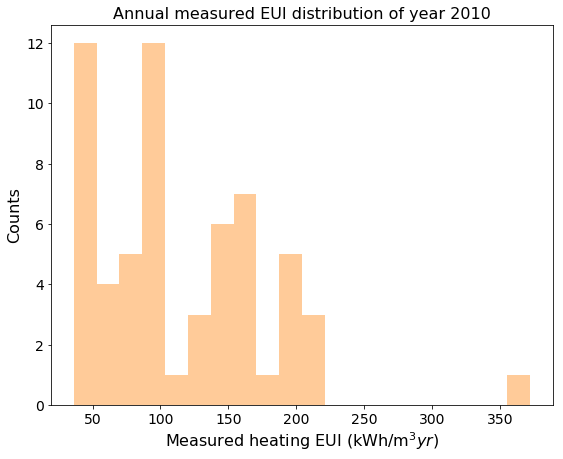

In [104]:
plt.figure(figsize=(9, 7))
color = plt.get_cmap('Set1')

sns.distplot( a=df["l_pc6_consumption_kwh_m3"], hist=True, kde=False, rug=False, bins=20, color=color(4))

plt.title('Annual measured EUI distribution of year 2010', fontsize=16)
plt.ylabel('Counts', fontsize=16)
plt.xlabel('Measured heating EUI (kWh/m$^3 yr$)', fontsize=16)
plt.tick_params(axis='both', labelsize=14)